In [103]:
import pandas as pd
import numpy as np

In [104]:
#the dataset is taken from the kaggle about diabates
df=pd.read_csv('kaggle_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [105]:
# lets rename the big column names with small ones
df=df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [106]:
#let us check whether if there is any nan value
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [107]:
#by observing the dataset we can understand that nan values are replaced with 0
#so lets convert all the 0's to nan
df2=df.copy()
df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df2.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

In [108]:
df.shape

(2000, 9)

In [109]:
#as the nan values in glucose are less lets replace them with mean
df2['Glucose'].fillna(df2['Glucose'].mean(),inplace=True)
df2.isnull().sum()

Pregnancies        0
Glucose            0
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

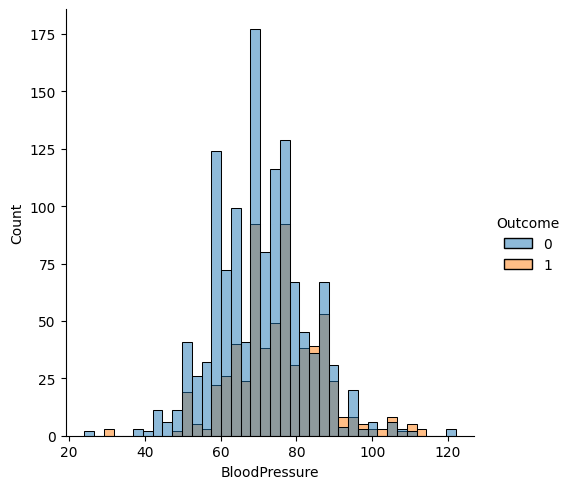

In [110]:
#let us visually observe the count of bp by using displot  
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(x=df2['BloodPressure'],hue=df2['Outcome'])

In [111]:
df2['BloodPressure'].median()

72.0

In [112]:
#by observng the graph we can take the median to replace the nan values of bp
df2['BloodPressure'].fillna(df2.BloodPressure.median(),inplace=True)

In [113]:
df2['SkinThickness'].min()

7.0

In [114]:
df2['SkinThickness'].max()

110.0

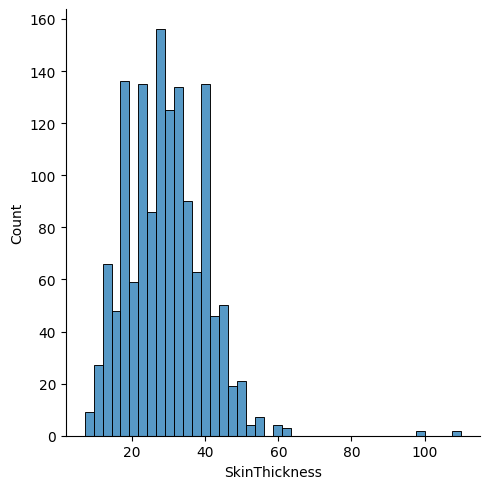

In [115]:
#let us similarly plot the distrubutons of other features to observe and choose mean or median
sns.displot(df2['SkinThickness'])

In [116]:
print(df2.SkinThickness.median())
df2.SkinThickness.mean()

29.0


29.34127540294324

In [117]:
df2['SkinThickness'].fillna(df2['SkinThickness'].median(),inplace=True)

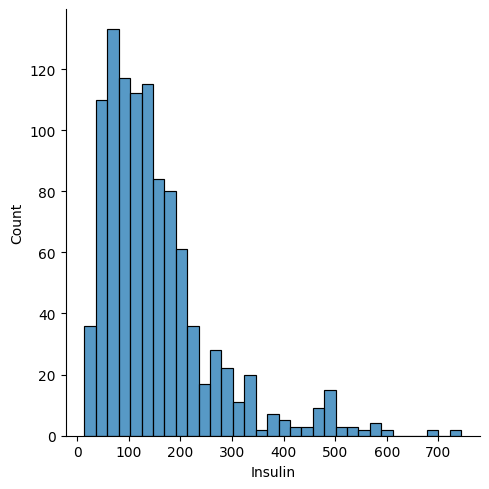

In [118]:
sns.displot(df2['Insulin'])

In [119]:
df2['Insulin'].mean()

153.74329501915707

In [120]:
df2['Insulin'].median()

126.0

In [121]:
df2['Insulin'].fillna(df2['Insulin'].median(),inplace=True)

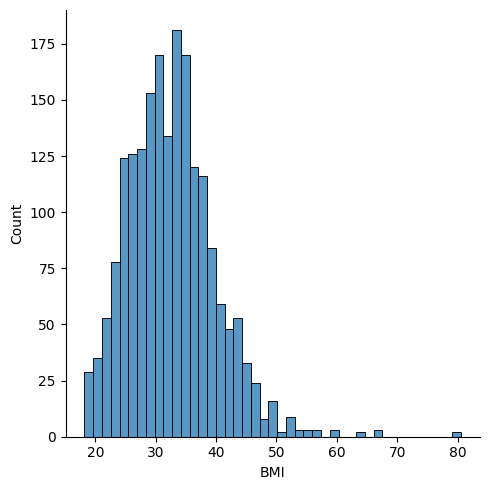

In [122]:
sns.displot(df2['BMI'])

In [123]:
print(df2['BMI'].median())
df2['BMI'].mean()

32.4


32.6501014198783

In [124]:
df2['BMI'].fillna(df2['BMI'].median(),inplace=True)

In [125]:
df2.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [126]:
#our features are ready now let us split the data to perform feature selection and find the best method to give the correct output
x=df2.drop(['Outcome'],axis='columns')
y=df2['Outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [127]:
#let us first test on linear regression as we know as the data is binary linear regression gives less score 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.26395837405346034

In [128]:
#now let us use the randomm forest and plot a graph to show which n_estimators graph will give the best output
scores=[]
from sklearn.ensemble import RandomForestClassifier
for i in range(1,40):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(x_train,y_train)
    scores.append(rf.score(x_test,y_test))

Text(0, 0.5, 'accuracy scores')

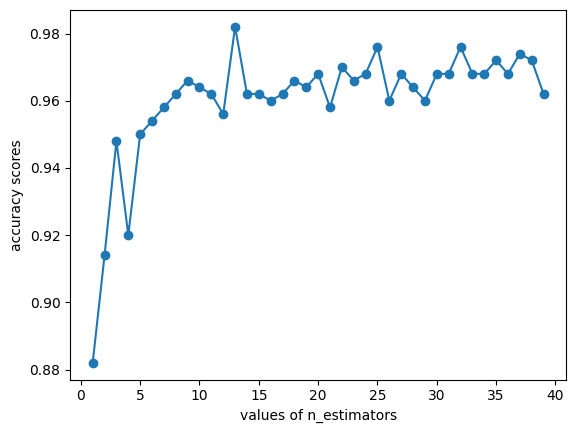

In [129]:
plt.plot(range(1,40),scores,marker='o')
plt.xlabel('values of n_estimators')
plt.ylabel('accuracy scores')

In [130]:
#by obsercing the graph we choose 32 as the best n_estimator value
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=32)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

1.0

In [131]:
#similarly we will perform the same for kneighbors
from sklearn.neighbors import KNeighborsClassifier
scores_kn=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    scores_kn.append(knn.score(x_test,y_test))
scores_kn

[0.968,
 0.912,
 0.85,
 0.826,
 0.8,
 0.796,
 0.784,
 0.778,
 0.768,
 0.762,
 0.742,
 0.742,
 0.75,
 0.756,
 0.744,
 0.764,
 0.756,
 0.75,
 0.754,
 0.756,
 0.756,
 0.764,
 0.76,
 0.762,
 0.754,
 0.772,
 0.78,
 0.768,
 0.762,
 0.772,
 0.762,
 0.752,
 0.746,
 0.75,
 0.748,
 0.75,
 0.754,
 0.762,
 0.756]

In [132]:
#as the kneighbors classifier is not giving the best output when compared to choose random forest
#so Random forest is giving the best output
classifier=RandomForestClassifier(n_estimators=32)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=32)

In [134]:
#creating a pickle file for the classifier
import pickle
filename = 'diabatesmodel.pkl'
pickle.dump(classifier, open(filename, 'wb'))